In [ ]:
#Se instalan dependencias que no estan preinstaladas en Colab
!pip install pydataxm

#Se prepara el entorno para caragar de manera limpia el repositorio de código fuente
!rm -fr seminario_UdeA

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 966.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.4-py3-none-any.whl size=4373 sha256=fb9dcfa4a5cf7cda92449c18d21ef5e4b86e1d56c32813864369aeea1f0d36bc
  Stored in directory: /root/.cache/pip/wheels/96/53/72/83cc2365f9375766c5d3fe0ecd084e09f08ead718397add148
Successfully built pydataxm


In [ ]:
#Se clona el repositorio donde estan los datasets que fueron obtenidos de las distintas fuentes que se abordarán a lo largo de este notebook
!git clone https://DevOpsPractices2022@dev.azure.com/DevOpsPractices2022/Seminario_UdeA/_git/Seminario_UdeA seminario_UdeA

Cloning into 'seminario_UdeA'...
remote: Azure Repos
remote: Found 31 objects to send. (306 ms)
Unpacking objects: 100% (31/31), 221.05 MiB | 2.10 MiB/s, done.
Updating files: 100% (10/10), done.


## Librerías

In [ ]:
#Librerias para tratamiento de datos o graficar
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

#Librerias de XM para consumir sus bases de datos
from pydataxm import pydataxm
from pydataxm import *

#Librerias para graficar
import plotly.express as px
import matplotlib.pyplot as plt

# Preparacion de datos
from sklearn.neighbors import LocalOutlierFactor

#Manejo de funcionalidades que dependen del sistema operativo
import os

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Alimentos


Este dataset se encuentra disponible en la pagina de la [DIAN](https://microdatos.dane.gov.co/index.php/catalog/645/study-description) con
los datos de volúmenes mayoristas que se recolectan y que corresponden a los productos de la canasta (verduras y hortalizas, frutas frescas, tubérculos raíces y plátanos, granos y cereales, huevos y lácteos, carnes, pescados y productos procesados), para esto se tienen en cuenta las siguientes variables: nombre y variedad del producto, volumen transportado, empaque, procedencia y destino.

- Variables de clasificación: grupos de alimentos que son verduras y hortalizas; frutas frescas; tubérculos; raíces y plátanos; granos y cereales; huevos y lácteos; carnes, pescados y mariscos, y procesados.

- Variables de análisis: volúmenes acopiados, tendencia de los inventarios en el mercado mayorista

Estas son las variables principales del dataset original

| NOMBRE             | ETIQUETA           | TIPO               | FORMATO            | PREGUNTA           |
|--------------------|--------------------|--------------------|--------------------|--------------------|
| Fuente             | Fuente             | discrete character | Fuente             |                    |
| FechaEncuesta      | FechaEncuesta      | discrete character | FechaEncuesta      |                    |
| Cod.DeptoProc.     | Cod. Depto Proc.  | discrete character | Cod. Depto Proc.  |                    |
| Cod.MunicipioProc. | Cod. Municipio Proc. | discrete character | Cod. Municipio Proc. |                 |
| DepartamentoProc.  | Departamento Proc. | discrete character | Departamento Proc. |                    |
| MunicipioProc.     | Municipio Proc.   | discrete character | Municipio Proc.   |                    |
| Grupo              | Grupo              | discrete character | Grupo              |                    |
| Ali                | Ali                | discrete character | Alimentos          |                    |
| CantKg             | Cant Kg            | contin numeric     | Cant Kg            |                    |

In [ ]:
#Este dataset fue procesado anteriormente para cambiar el encoding, ya que estaba causando problemas con caracteres epeciales del español,
#el encodig original era 'ansi' el cual no fue posible cambiar desde Colab ya que despues de intetar varios tipos de codificación (entre ellas, algunas iso, ascii o latin)
#ninguna fue adecuada, y la codificacion ansi no es soportada en este entorno

#Ruta principal con los archivos de Excel historico para alimentos
ruta_carpeta = r"seminario_UdeA/alimentos"

#Se agragan a la lista todos los archivos en la ruta principal (ruta_carpeta) que sean CSV
archivos_excel = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith('.csv')]
tablas = []

#Se leen cada uno de los archivos como dataframes y se agregan a una lista para ser concatenados despues
for archivo in archivos_excel:
  ruta_completa = os.path.join(ruta_carpeta, archivo)

  tablas.append(pd.read_csv(ruta_completa, sep=";"))

  print(archivo)

2019_SemI.csv
SIPSA_A_Isem2022.csv
2020_SemII.csv
2019_SemII.csv
SIPSA_A_IIsem2022.csv
2020_SemI.csv
2021(II Semestre).csv
2021 ( I Semestre).csv


In [ ]:
#Se concatenan los dataframes de los años 2013 a 2015
df_alimentos = pd.concat(tablas)
df_alimentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7321360 entries, 0 to 887474
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Fuente                object 
 1   FechaEncuesta         object 
 2   Cod. Depto Proc.      object 
 3   Cod. Municipio Proc.  object 
 4   Departamento Proc.    object 
 5   Municipio Proc.       object 
 6   Grupo                 object 
 7   Ali                   object 
 8   Cant Kg               object 
 9   Unnamed: 9            float64
 10  Unnamed: 10           float64
dtypes: float64(2), object(9)
memory usage: 670.3+ MB


In [ ]:
#Se muestran las columnas originales sin ningun tratamiento inicial
df_alimentos.head()

,Fuente,FechaEncuesta,Cod. Depto Proc.,Cod. Municipio Proc.,Departamento Proc.,Municipio Proc.,Grupo,Ali,Cant Kg,Unnamed: 9,Unnamed: 10
0,"Armenia, Mercar",02/01/2019,'52,'52317,NARIÑO,GUACHUCAL,"TUBERCULOS, RAICES Y PLATANOS",Papa suprema,10000,NaN,NaN
1,"Armenia, Mercar",02/01/2019,'52,'52838,NARIÑO,TÚQUERRES,"TUBERCULOS, RAICES Y PLATANOS",Papa suprema,10000,NaN,NaN
2,"Armenia, Mercar",02/01/2019,'63,'63001,QUINDÍO,ARMENIA,FRUTAS,Piña gold,1600,NaN,NaN
3,"Armenia, Mercar",02/01/2019,'73,'73124,TOLIMA,CAJAMARCA,VERDURAS Y HORTALIZAS,Arveja verde en vaina,1000,NaN,NaN
4,"Armenia, Mercar",02/01/2019,'73,'73124,TOLIMA,CAJAMARCA,"TUBERCULOS, RAICES Y PLATANOS",Papa criolla,6000,NaN,NaN


In [ ]:
#Se segmenta el análisis para el departamento de Cundinamarca como uno de los principales del país
#ya que concentra la mayor poblacion

df_alimentos_cundinamarca = df_alimentos[df_alimentos['Departamento Proc.'] == 'CUNDINAMARCA']

In [ ]:
# Convierte la columna 'fecha' a datetime especificando el formato correcto
df_alimentos_cundinamarca['FechaEncuesta'] = pd.to_datetime(df_alimentos_cundinamarca['FechaEncuesta'], format='%d/%m/%Y')

#Se Reemplazan los valores decimales separedos por coma para poder converir la columna de tipo objeto a float
df_alimentos_cundinamarca['Cant Kg'] = df_alimentos_cundinamarca['Cant Kg'].str.replace(',', '.')
df_alimentos_cundinamarca['Cant Kg'] = df_alimentos_cundinamarca['Cant Kg'].astype(float)

#Se confirma el cambio de tipo de dato
df_alimentos_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935881 entries, 21 to 887468
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Fuente                935881 non-null  object        
 1   FechaEncuesta         935881 non-null  datetime64[ns]
 2   Cod. Depto Proc.      935881 non-null  object        
 3   Cod. Municipio Proc.  935881 non-null  object        
 4   Departamento Proc.    935881 non-null  object        
 5   Municipio Proc.       935881 non-null  object        
 6   Grupo                 935881 non-null  object        
 7   Ali                   935881 non-null  object        
 8   Cant Kg               935881 non-null  float64       
 9   Unnamed: 9            0 non-null       float64       
 10  Unnamed: 10           0 non-null       float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 85.7+ MB


In [ ]:
#Se grafican las distribuciones de las distintas columnas categóricas del dataframe
# Recorrer cada columna en el DataFrame
for columna in df_alimentos_cundinamarca.columns:
    # Verificar si la columna es de tipo objeto (categórica)
    if df_alimentos_cundinamarca[columna].dtype == 'object':

        # Contar la frecuencia de cada categoría
        conteos = df_alimentos_cundinamarca[columna].value_counts()

        # Crear un gráfico de barras
        fig = px.bar(x=conteos.index, y=conteos.values, title=f'Distribución de {columna}')
        fig.show()

# Aqui se observa que Bogotá es la mayor fuente en cuanto al abasto en cuanto alimentos en el país,
# Tambien se observa que la economia de alimentos Colombiana esta basada en su mayoria, por Verduras,
# Hortalizas, Frutas, Tuberculos, Raices y platanos como los productos más comunes

In [ ]:
#Lista de variables numéricas
numCols=df_alimentos_cundinamarca.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
numCols

['Cant Kg', 'Unnamed: 9', 'Unnamed: 10']

In [ ]:
#Lista de variables categóricas
catCols = df_alimentos_cundinamarca.select_dtypes(include = ["object", 'category']).columns.tolist()

# Distribución de cada variable categórica en el conjunto de datos, lo cual le da valores específicos a lo que ya se represento en la gráfica anterior
for col in catCols:
  print("="*5 + f" {col} " + "="*20)
  print(df_alimentos_cundinamarca[col].value_counts())
  print()

===== Fuente ====================
Fuente
Bogotá, D.C., Corabastos                        694685
Villavicencio, CAV                               55367
Bogotá, D.C., Paloquemao                         36870
Cartagena, Bazurto                               22125
Medellín, Central Mayorista de Antioquia         21974
Barranquilla, Barranquillita                     21652
Bogotá, D.C., Plaza Samper Mendoza               14602
Ibagué, Plaza La 21                               9249
Barranquilla, Granabastos                         8806
Neiva, Surabastos                                 7829
Armenia, Mercar                                   7272
Bogotá, D.C., Plaza Las Flores                    7214
Medellín, Plaza Minorista "José María Villa"      6907
Bucaramanga, Centroabastos                        6843
Manizales, Centro Galerías                        4267
Tunja, Complejo de Servicios del Sur              4131
Cúcuta, Cenabastos                                1750
Cali, Santa Helena      

In [ ]:
# Se crea una tabla dinámica con el objetivo de convertir las distintas categorias de alimentos en columnas y hacer
# un totalizado de cada alimento diariamente, lo cual permitirá la integración con el dataset de precipitaciones basado en las fechas, con el fin de
# correlacionar sus varibles
df_alimentos_cundinamarca = df_alimentos_cundinamarca.pivot_table(index=df_alimentos_cundinamarca['FechaEncuesta'], columns='Grupo', values='Cant Kg', aggfunc='sum')

#Se valida el dataFrame agrupado
df_alimentos_cundinamarca

Grupo,CARNES,FRUTAS,GRANOS Y CEREALES,LACTEOS Y HUEVOS,PESCADOS,PROCESADOS,"TUBERCULOS, RAICES Y PLATANOS",VERDURAS Y HORTALIZAS
FechaEncuesta,,,,,,,,
2019-01-02,NaN,420270.0,NaN,19970.0,NaN,87930.0,370800.0,1087314.0
2019-01-03,38100.0,420316.0,NaN,45660.0,1000.0,95880.0,1070960.0,1809516.0
2019-01-04,37600.0,622737.0,NaN,32944.0,NaN,58784.6,1512150.0,1718775.0
2019-01-05,34500.0,402158.0,NaN,15182.0,200.0,52150.0,1242150.0,1386096.0
2019-01-06,NaN,53225.0,2500.0,NaN,NaN,NaN,886360.0,241629.5
...,...,...,...,...,...,...,...,...
2022-12-27,12600.0,567427.0,NaN,24520.0,2000.0,70630.0,1818580.0,1814989.0
2022-12-28,8100.0,651682.0,NaN,9000.0,NaN,292500.0,2296400.0,1809635.0
2022-12-29,20160.0,566420.0,NaN,6250.0,NaN,160050.0,2645000.0,2164357.0


In [ ]:
# Como las siguientes columnas no son continuas, en cuanto a registros diarios,
# o no representan una variable ralacionada a las precipitaciones, se eliminan del dataFrame
df_alimentos_cundinamarca = df_alimentos_cundinamarca.drop(['CARNES', 'PROCESADOS', 'PESCADOS', 'LACTEOS Y HUEVOS', ], axis = 1)

#Se verifica de nuevo el dataFrame, para corroborar la eliminación de columnas
df_alimentos_cundinamarca.head()

Grupo,FRUTAS,GRANOS Y CEREALES,"TUBERCULOS, RAICES Y PLATANOS",VERDURAS Y HORTALIZAS
FechaEncuesta,,,,
2019-01-02,420270.0,NaN,370800.0,1087314.0
2019-01-03,420316.0,NaN,1070960.0,1809516.0
2019-01-04,622737.0,NaN,1512150.0,1718775.0
2019-01-05,402158.0,NaN,1242150.0,1386096.0
2019-01-06,53225.0,2500.0,886360.0,241629.5


In [ ]:
# Identificación de valores nulos para las variables numéricas, con el fin de tomar acciones respecto a la integridad de la columna
for col in df_alimentos_cundinamarca.columns:
  print (col, np.sum(pd.isnull(df_alimentos_cundinamarca[col])))

FRUTAS 1
GRANOS Y CEREALES 521
TUBERCULOS, RAICES Y PLATANOS 1
VERDURAS Y HORTALIZAS 0


In [ ]:
# Se imprime un resumen del dataset transformado y se puede observar una gran cantidad de datos faltantes para los GRANOS Y CEREALES
# Esta cantidad de datos faltantes deriva en la eliminación de dicha columna
print(df_alimentos_cundinamarca.info())

#Se elimina la columna de 'GRANOS Y CEREALES' ya que no tiene un aporte significativo
df_alimentos_cundinamarca.drop(['GRANOS Y CEREALES', ], axis = 1, inplace = True)

#Como se mostró en la celda anterior, los demás grupos de alimentos poseen una cantidad mínima de nulos que pueden ser decartados sin afectar la integridad del dataset
df_alimentos_cundinamarca.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1268 entries, 2019-01-02 to 2022-12-31
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FRUTAS                         1267 non-null   float64
 1   GRANOS Y CEREALES              747 non-null    float64
 2   TUBERCULOS, RAICES Y PLATANOS  1267 non-null   float64
 3   VERDURAS Y HORTALIZAS          1268 non-null   float64
dtypes: float64(4)
memory usage: 49.5 KB
None


In [ ]:
# Se renombra la columna de fecha de creacion de registro(FechaEncuesta) por 'FechaObservacion',
# esto permite que el dataFrame se pueda integrar/fusionar por fecha con el dataset de precipitaciones
df_alimentos_cundinamarca = df_alimentos_cundinamarca.reset_index().rename(columns={'FechaEncuesta': 'FechaObservacion'})

#Se verifica la aplicación correcta del cambio
df_alimentos_cundinamarca

Grupo,FechaObservacion,FRUTAS,"TUBERCULOS, RAICES Y PLATANOS",VERDURAS Y HORTALIZAS
0,2019-01-02,420270.0,370800.0,1087314.0
1,2019-01-03,420316.0,1070960.0,1809516.0
2,2019-01-04,622737.0,1512150.0,1718775.0
3,2019-01-05,402158.0,1242150.0,1386096.0
4,2019-01-06,53225.0,886360.0,241629.5
...,...,...,...,...
1262,2022-12-27,567427.0,1818580.0,1814989.0
1263,2022-12-28,651682.0,2296400.0,1809635.0
1264,2022-12-29,566420.0,2645000.0,2164357.0
1265,2022-12-30,549827.0,2546050.0,1355931.0


In [ ]:
#Se inspecciona de nuevo el dataframe, se observa como todas las variables son numéricas y datetime
df_alimentos_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FechaObservacion               1267 non-null   datetime64[ns]
 1   FRUTAS                         1267 non-null   float64       
 2   TUBERCULOS, RAICES Y PLATANOS  1267 non-null   float64       
 3   VERDURAS Y HORTALIZAS          1267 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 39.7 KB


In [ ]:
# Se procede a graficar el comportamiento de los volumenes de alimentos en el tiempo, donde se observa
# una cantidad de registros faltantes importantes entre Julio de 2021 y Enero del 2022

# Resample a frecuencia semanal y calcular el promedio rodante (rolling average) por semana
df_monthly = df_alimentos_cundinamarca.set_index('FechaObservacion').resample('W').mean()

# Crear el gráfico con Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y=df_monthly.columns, title='Rolling Average by Month')

# Mostrar el gráfico
fig.show()

## Precipitaciones


Este dataset posee información de distintas regiones del pais, basadas en sensores que recolectan la información. Estos datos son de libre acceso en la página oficial de gobierno [datos precipitación](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Precipitaci-n/s54a-sgyg/about_data). las siguientes son aclaraciones hechas en el dataset:

1. Los datos no están validados por el IDEAM.
2. Son datos crudos de estaciones automáticas o de convenios con terceras entidades.
3. Se proporcionan como herramienta de transparencia y gestión del riesgo, cumpliendo con la Ley 1712 de 2014.
4. Pueden tener retrasos debido a la frecuencia de envío de datos y los medios de transmisión.
5. Pueden contener errores e inconsistencias, incluyendo fallas en los sensores.
6. El uso e interpretación de los datos es responsabilidad del usuario.
7. El IDEAM no se hace responsable de justificar o validar los datos fuera de los canales oficiales.
8. Los datos no pueden ser utilizados como evidencia jurídica.




| Nombre de la columna | Descripción                                       | Tipo           |
|----------------------|---------------------------------------------------|----------------|
| CodigoEstacion       | Corresponde al valor de identificación de la estación dentro del catálogo de estaciones | Texto simple   |
| CodigoSensor         | Código de identificación asignado al sensor      | Texto simple   |
| FechaObservacion     | Fecha en la cual se realiza la medición           | Fecha y hora   |
| ValorObservado       | Valor medido                                      | Número         |
| NombreEstacion       | Corresponde a la identificación de la estación dentro del catálogo de estaciones | Texto simple   |
| Departamento         | Nombre del departamento donde se ubica la estación | Texto simple   |
| Municipio            | Nombre del Municipio donde se localiza la estación | Texto simple   |
| ZonaHidrografica     | Zona hidrográfica sobre la cual está ubicada la estación | Texto simple   |
| Latitud              | Corresponde a la latitud en la cual se ubica la estación | Número         |
| Longitud             | Corresponde a la longitud en la cual se ubica la estación | Número         |
| DescripcionSensor    | Precipitación                                     | Texto simple   |
| UnidadMedida         | Milimetros                                        | Texto simple   |


In [ ]:
# Para obtener estos datos se hizo uso de la API de datos del gobierno, cómo esta API no funciona de manera muy eficiente,
# se tuvieron en cuenta 2 Departamentos (Antioquia y Cundinamarca) que concentran la mayor cantidad de embalses del País (según XM https://www.xm.com.co/hidrologia/embalses ) entre los periodos 2019-2022
# se optó por guardar todos estos datos compactados en un CSV en vez de JSON(como lo realiza el código)
# ya que es menos pesado

'''
# Importamos las bibliotecas necesarias
#import requests
#import json

# Definimos la URL principal y la cláusula WHERE para filtrar datos
#main_url = 'https://datos.gov.co/resource/s54a-sgyg.json'
#where_clause = "(fechaobservacion between '2015-01-01T00:00:00' and '2018-12-31T23:59:59')"

# Establecemos el límite de solicitudes y el desplazamiento inicial
#req_limit = 50000
req_offset = 0

# Creamos una lista vacía para almacenar los resultados
list_results = []

# Definimos el payload y los encabezados de la solicitud
payload = {}
headers = {'Content-type': 'application/json'}
'''

'\n# Importamos las bibliotecas necesarias\n#import requests\n#import json\n\n# Definimos la URL principal y la cláusula WHERE para filtrar datos\n#main_url = \'https://datos.gov.co/resource/s54a-sgyg.json\'\n#where_clause = "(fechaobservacion between \'2015-01-01T00:00:00\' and \'2018-12-31T23:59:59\')"\n\n# Establecemos el límite de solicitudes y el desplazamiento inicial\n#req_limit = 50000\nreq_offset = 0\n\n# Creamos una lista vacía para almacenar los resultados\nlist_results = []\n\n# Definimos el payload y los encabezados de la solicitud\npayload = {}\nheaders = {\'Content-type\': \'application/json\'}\n'

In [ ]:
#Se ejecutan las peticiones por lotes de 50000 datos a la API
'''
# Loop para obtener datos en fragmentos
count = 50000
while True:
    # Construimos la URL con el límite, la cláusula WHERE, el desplazamiento y el departamento deseado
    url = f"{main_url}?$limit={req_limit}&$where={where_clause}&$offset={req_offset}&departamento=ANTIOQUIA"

    # Obtenemos los datos
    results_chunk = requests.get(url, headers=headers, data=payload, stream=True)
    response_json = results_chunk.json()

    # Rompemos el bucle si no se devuelven más resultados
    if len(response_json) == 0:
        break

    # Guardamos los resultados en la lista principal
    # Guardamos los datos JSON en un archivo
    output_file = f"./precipitaciones_{count}.json"
    with open(output_file, 'w') as f:
        json.dump(response_json, f)

    print(f"Datos guardados en {output_file}")
    print(req_offset)
    # Incrementamos el desplazamiento y el contador
    req_offset += req_limit
    count += req_limit
'''

'\n# Loop para obtener datos en fragmentos\ncount = 50000\nwhile True:\n    # Construimos la URL con el límite, la cláusula WHERE, el desplazamiento y el departamento deseado\n    url = f"{main_url}?$limit={req_limit}&$where={where_clause}&$offset={req_offset}&departamento=ANTIOQUIA"\n\n    # Obtenemos los datos\n    results_chunk = requests.get(url, headers=headers, data=payload, stream=True)\n    response_json = results_chunk.json()\n\n    # Rompemos el bucle si no se devuelven más resultados\n    if len(response_json) == 0:\n        break\n\n    # Guardamos los resultados en la lista principal\n    # Guardamos los datos JSON en un archivo\n    output_file = f"./precipitaciones_{count}.json"\n    with open(output_file, \'w\') as f:\n        json.dump(response_json, f)\n\n    print(f"Datos guardados en {output_file}")\n    print(req_offset)\n    # Incrementamos el desplazamiento y el contador\n    req_offset += req_limit\n    count += req_limit\n'

In [ ]:
#Ruta de la Carpeta con los archivos de Excel historicos de Precipitaciones
ruta_carpeta = r"seminario_UdeA/precipitaciones"

In [ ]:
# Creamos una lista de archivos Excel en la carpeta especificada
archivos_excel = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith('.csv')]

# Creamos una lista vacía para almacenar las tablas
tablas = []

# Iteramos sobre cada archivo en la lista de archivos Excel
for archivo in archivos_excel:
    # Obtenemos la ruta completa del archivo
    ruta_completa = os.path.join(ruta_carpeta, archivo)

    # Leemos el archivo CSV y lo agregamos a la lista de tablas
    tablas.append(pd.read_csv(ruta_completa))

    # Imprimimos el nombre del archivo para mostrar progreso
    print(archivo)


antioquia_19to22.csv
cundinamarca_19to22.csv


In [ ]:
#Se concatenan los distintos archivos de Excel en un solo dataFrame
df_precipitacion_total = pd.concat(tablas)

#Se verifica el dataFrame
df_precipitacion_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14454502 entries, 0 to 7443689
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.4+ GB


In [ ]:
# Verificación y eliminación de registros duplicados

# Primero se verifican los registros duplicados
df_precipitacion_total.loc[df_precipitacion_total.duplicated()]

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
1791705,12017020,240,08/28/2019 12:40:00 AM,0.0,BARRANQUILLITA - AUT,ANTIOQUIA,CHIGORODÓ,CARIBE - LITORAL,7.571583,-76.710556,Precipitacion,mm
1791706,2308500068,240,09/08/2019 03:40:00 AM,0.0,SANTUARIO - AUT,ANTIOQUIA,SANTUARIO,MEDIO MAGDALENA,6.133028,-75.275267,Precipitacion,mm
1791707,23085501,240,09/12/2019 02:20:00 AM,0.0,COCORNA - AUT,ANTIOQUIA,COCORNÁ,MEDIO MAGDALENA,6.061942,-75.186667,Precipitacion,mm
1791708,23085501,240,09/01/2019 07:25:00 AM,0.0,COCORNA - AUT,ANTIOQUIA,COCORNÁ,MEDIO MAGDALENA,6.061942,-75.186667,Precipitacion,mm
1791709,26180180,240,09/08/2019 06:00:00 AM,0.0,SONSON,ANTIOQUIA,SONSÓN,CAUCA,5.715250,-75.294500,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
1733785,23065110,240,09/14/2019 05:10:00 AM,0.0,YACOPI - AUT,CUNDINAMARCA,YACOPÍ,MEDIO MAGDALENA,5.484167,-74.354583,Precipitacion,mm
1733786,23067060,240,09/10/2019 05:40:00 AM,0.0,TOBIA - AUT,CUNDINAMARCA,NIMAIMA,MEDIO MAGDALENA,5.125306,-74.447056,Precipitacion,mm
1733787,21197080,240,09/06/2019 06:30:00 PM,0.0,BONANZA LA HACIENDA - AUT,CUNDINAMARCA,SILVANIA,ALTO MAGDALENA,4.400028,-74.363583,Precipitacion,mm
1733788,2120500135,240,09/06/2019 07:50:00 AM,0.0,UNIVERSIDAD DE LA SABANA - AUT,CUNDINAMARCA,CHÍA,ALTO MAGDALENA,4.854750,-74.032669,Precipitacion,mm


In [ ]:
# Se procede con la eliminación de registros duplicados
df_precipitacion_total = df_precipitacion_total.drop_duplicates()

#Reiniciar el indice
df_precipitacion_total.reset_index(drop=True, inplace=True)

Se intentó hacer una eliminación de datos atípicos con el rango inter cuartil, esto hizo que se eliminaran los datos diferentes de 0 en cuanto al valor de precipitacion, ya que los datos en 0 son los que mas se repiten. Asi que este enfoque de limpieza no fue efectivo para este dataset.

In [ ]:
# Se inspecciona de nuevo el dataFrame para verificar su tamaño y variables
df_precipitacion_total

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,27015320,240,04/16/2019 12:50:00 AM,0.0,ARAGON - AUT,ANTIOQUIA,SANTA ROSA DE OSOS,NECHÍ,6.781083,-75.560889,Precipitacion,mm
1,23085080,240,06/30/2019 10:40:00 PM,0.0,GRANJA EXPERIOMENTAL EL NUS - AUT,ANTIOQUIA,SAN ROQUE,MEDIO MAGDALENA,6.483583,-74.836694,Precipitacion,mm
2,26205501,240,01/27/2019 03:40:00 PM,0.0,EL ROSARIO - AUT,ANTIOQUIA,VENECIA,CAUCA,5.625831,-75.705278,Precipitacion,mm
3,26205501,240,01/05/2019 10:15:00 AM,0.0,EL ROSARIO - AUT,ANTIOQUIA,VENECIA,CAUCA,5.625831,-75.705278,Precipitacion,mm
4,27015320,240,03/08/2019 06:20:00 AM,0.0,ARAGON - AUT,ANTIOQUIA,SANTA ROSA DE OSOS,NECHÍ,6.781083,-75.560889,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
13880781,3502500135,240,12/31/2022 10:40:00 AM,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880782,3502500135,240,12/31/2022 02:20:00 AM,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880783,35027510,240,12/31/2022 12:20:00 AM,0.0,CALOSTROS BAJO - AUT,CUNDINAMARCA,LA CALERA,META,4.664500,-73.863083,Precipitacion,mm
13880784,3502500135,240,12/31/2022 03:25:00 AM,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm


In [ ]:
#Para seguir con el mismo enfoque de analisis por regiones se filtra el dataFrame sólo en le departamento de Cundinamarca
df_precipitacion_cundinamarca = df_precipitacion_total[df_precipitacion_total['Departamento'] == 'CUNDINAMARCA']

In [ ]:
# Se convierte la columna FechaObservación a dateTime para procesar los datos de manera más eficiente
df_precipitacion_cundinamarca['FechaObservacion'] = pd.to_datetime(df_precipitacion_cundinamarca['FechaObservacion'])

In [ ]:
# Se verifican las variables del dataSet y sus tipos
df_precipitacion_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7167808 entries, 6712978 to 13880785
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     int64         
 1   CodigoSensor       int64         
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float64       
 4   NombreEstacion     object        
 5   Departamento       object        
 6   Municipio          object        
 7   ZonaHidrografica   object        
 8   Latitud            float64       
 9   Longitud           float64       
 10  DescripcionSensor  object        
 11  UnidadMedida       object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 710.9+ MB


In [ ]:
#Se grafican las distribuciones de las distintas columnas categóricas del dataframe
# Recorrer cada columna en el DataFrame
for columna in df_precipitacion_cundinamarca.columns:
    # Verificar si la columna es de tipo objeto (categórica)
    if df_precipitacion_cundinamarca[columna].dtype == 'object':

        # Contar la frecuencia de cada categoría
        conteos = df_precipitacion_cundinamarca[columna].value_counts()

        # Crear un gráfico de barras
        fig = px.bar(x=conteos.index, y=conteos.values, title=f'Distribución de {columna}')
        fig.show()

In [ ]:
#Se inten realizar una inspeccion visual del rango de fechas, ya que se han echo exploraciones
#anteriores con problemas en los rangos debido a problemas con las queries de la API de datos del gobierno
df_precipitacion_cundinamarca.sort_values(by="FechaObservacion")

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
7385570,24015506,240,2019-01-01 12:00:00,0.0,CAPELLANIA - CAR,CUNDINAMARCA,FÚQUENE,SOGAMOSO,5.449000,-73.769000,Precipitacion,mm
7298005,24017330,240,2019-01-01 12:00:00,0.0,PTE LA BALSA - CAR,CUNDINAMARCA,LENGUAZAQUE,SOGAMOSO,5.326000,-73.764000,Precipitacion,mm
7965301,21195190,240,2019-01-01 12:00:00,0.0,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111,-74.311750,Precipitacion,mm
6906825,21237010,240,2019-01-01 12:00:00,0.0,NARINO - AUT,CUNDINAMARCA,NARIÑO,ALTO MAGDALENA,4.387778,-74.838375,Precipitacion,mm
7107805,21195170,240,2019-01-01 12:00:00,0.0,PAQUILO - AUT,CUNDINAMARCA,CABRERA,ALTO MAGDALENA,3.993611,-74.398056,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
13880760,3502500135,240,2022-12-31 11:59:00,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880622,3502500135,240,2022-12-31 12:00:00,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880208,35027001,240,2022-12-31 12:00:00,0.0,CAQUEZA PLAZA DE FERIAS - TXGPRS,CUNDINAMARCA,CÁQUEZA,META,4.403000,-73.941000,Precipitacion,mm
13880591,21205502,240,2022-12-31 12:00:00,0.0,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Precipitacion,mm


In [ ]:
# Conservar solo la fecha (año, mes, día) sin la hora con la finalidad de agrupar los días y promedialos mas adelante
df_precipitacion_cundinamarca['FechaObservacion'] = df_precipitacion_cundinamarca['FechaObservacion'].dt.date

In [ ]:
#Se hace una breve inspección visual del efeto de la función anterior
df_precipitacion_cundinamarca.sort_values(by="FechaObservacion")

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
7076378,23065180,240,2019-01-01,0.0,VILLETA - AUT,CUNDINAMARCA,VILLETA,MEDIO MAGDALENA,5.016861,-74.470972,Precipitacion,mm
6751967,35027520,240,2019-01-01,0.0,BOCATOMA EAAB - AUT,CUNDINAMARCA,LA CALERA,META,4.661028,-73.833333,Precipitacion,mm
7495143,21209920,240,2019-01-01,0.0,SANTA ROSITA - AUT,CUNDINAMARCA,SUESCA,ALTO MAGDALENA,5.192250,-73.779056,Precipitacion,mm
7430919,23065503,240,2019-01-01,0.0,EL MIRADOR - AUT,CUNDINAMARCA,SASAIMA,MEDIO MAGDALENA,4.950000,-74.400000,Precipitacion,mm
7737929,23065180,240,2019-01-01,0.0,VILLETA - AUT,CUNDINAMARCA,VILLETA,MEDIO MAGDALENA,5.016861,-74.470972,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
13880117,3502500135,240,2022-12-31,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880118,3502500135,240,2022-12-31,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm
13880119,35027510,240,2022-12-31,0.0,CALOSTROS BAJO - AUT,CUNDINAMARCA,LA CALERA,META,4.664500,-73.863083,Precipitacion,mm
13880106,3502500135,240,2022-12-31,0.0,GUAYABETAL POLLO OLIMPICO - AUT,CUNDINAMARCA,GUAYABETAL,META,4.229669,-73.812625,Precipitacion,mm


In [ ]:
#Se verifican de nuevo los tipos de datos del conjunto
df_precipitacion_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7167808 entries, 6712978 to 13880785
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 710.9+ MB


In [ ]:
df_precipitacion_cundinamarca['FechaObservacion'] = pd.to_datetime(df_precipitacion_cundinamarca['FechaObservacion'])

In [ ]:
# Agrupar por las columnas 'fechaobservacion' y 'departamento', y calcular el promedio de 'valorobservado'
# lo cual nos permirirá mas adelante fusionar los datasets de alimentos y precipitación, y los de precipitación con los datasets de enrgía/embalses
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.groupby(['FechaObservacion', 'Departamento']).agg(promedio_precipitaciones=('ValorObservado', 'mean'))

# Restablecer el índice
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.reset_index()

In [ ]:
#Se verifica el efecto de este agrupamiento en los datos
print(df_precipitacion_cundinamarca.head(5))
df_precipitacion_cundinamarca.info()

  FechaObservacion  Departamento  promedio_precipitaciones
0       2019-01-01  CUNDINAMARCA                  0.097617
1       2019-01-02  CUNDINAMARCA                  0.098012
2       2019-01-03  CUNDINAMARCA                  0.098663
3       2019-01-04  CUNDINAMARCA                  0.108652
4       2019-01-05  CUNDINAMARCA                  0.108675
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FechaObservacion          1401 non-null   datetime64[ns]
 1   Departamento              1401 non-null   object        
 2   promedio_precipitaciones  1401 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.0+ KB


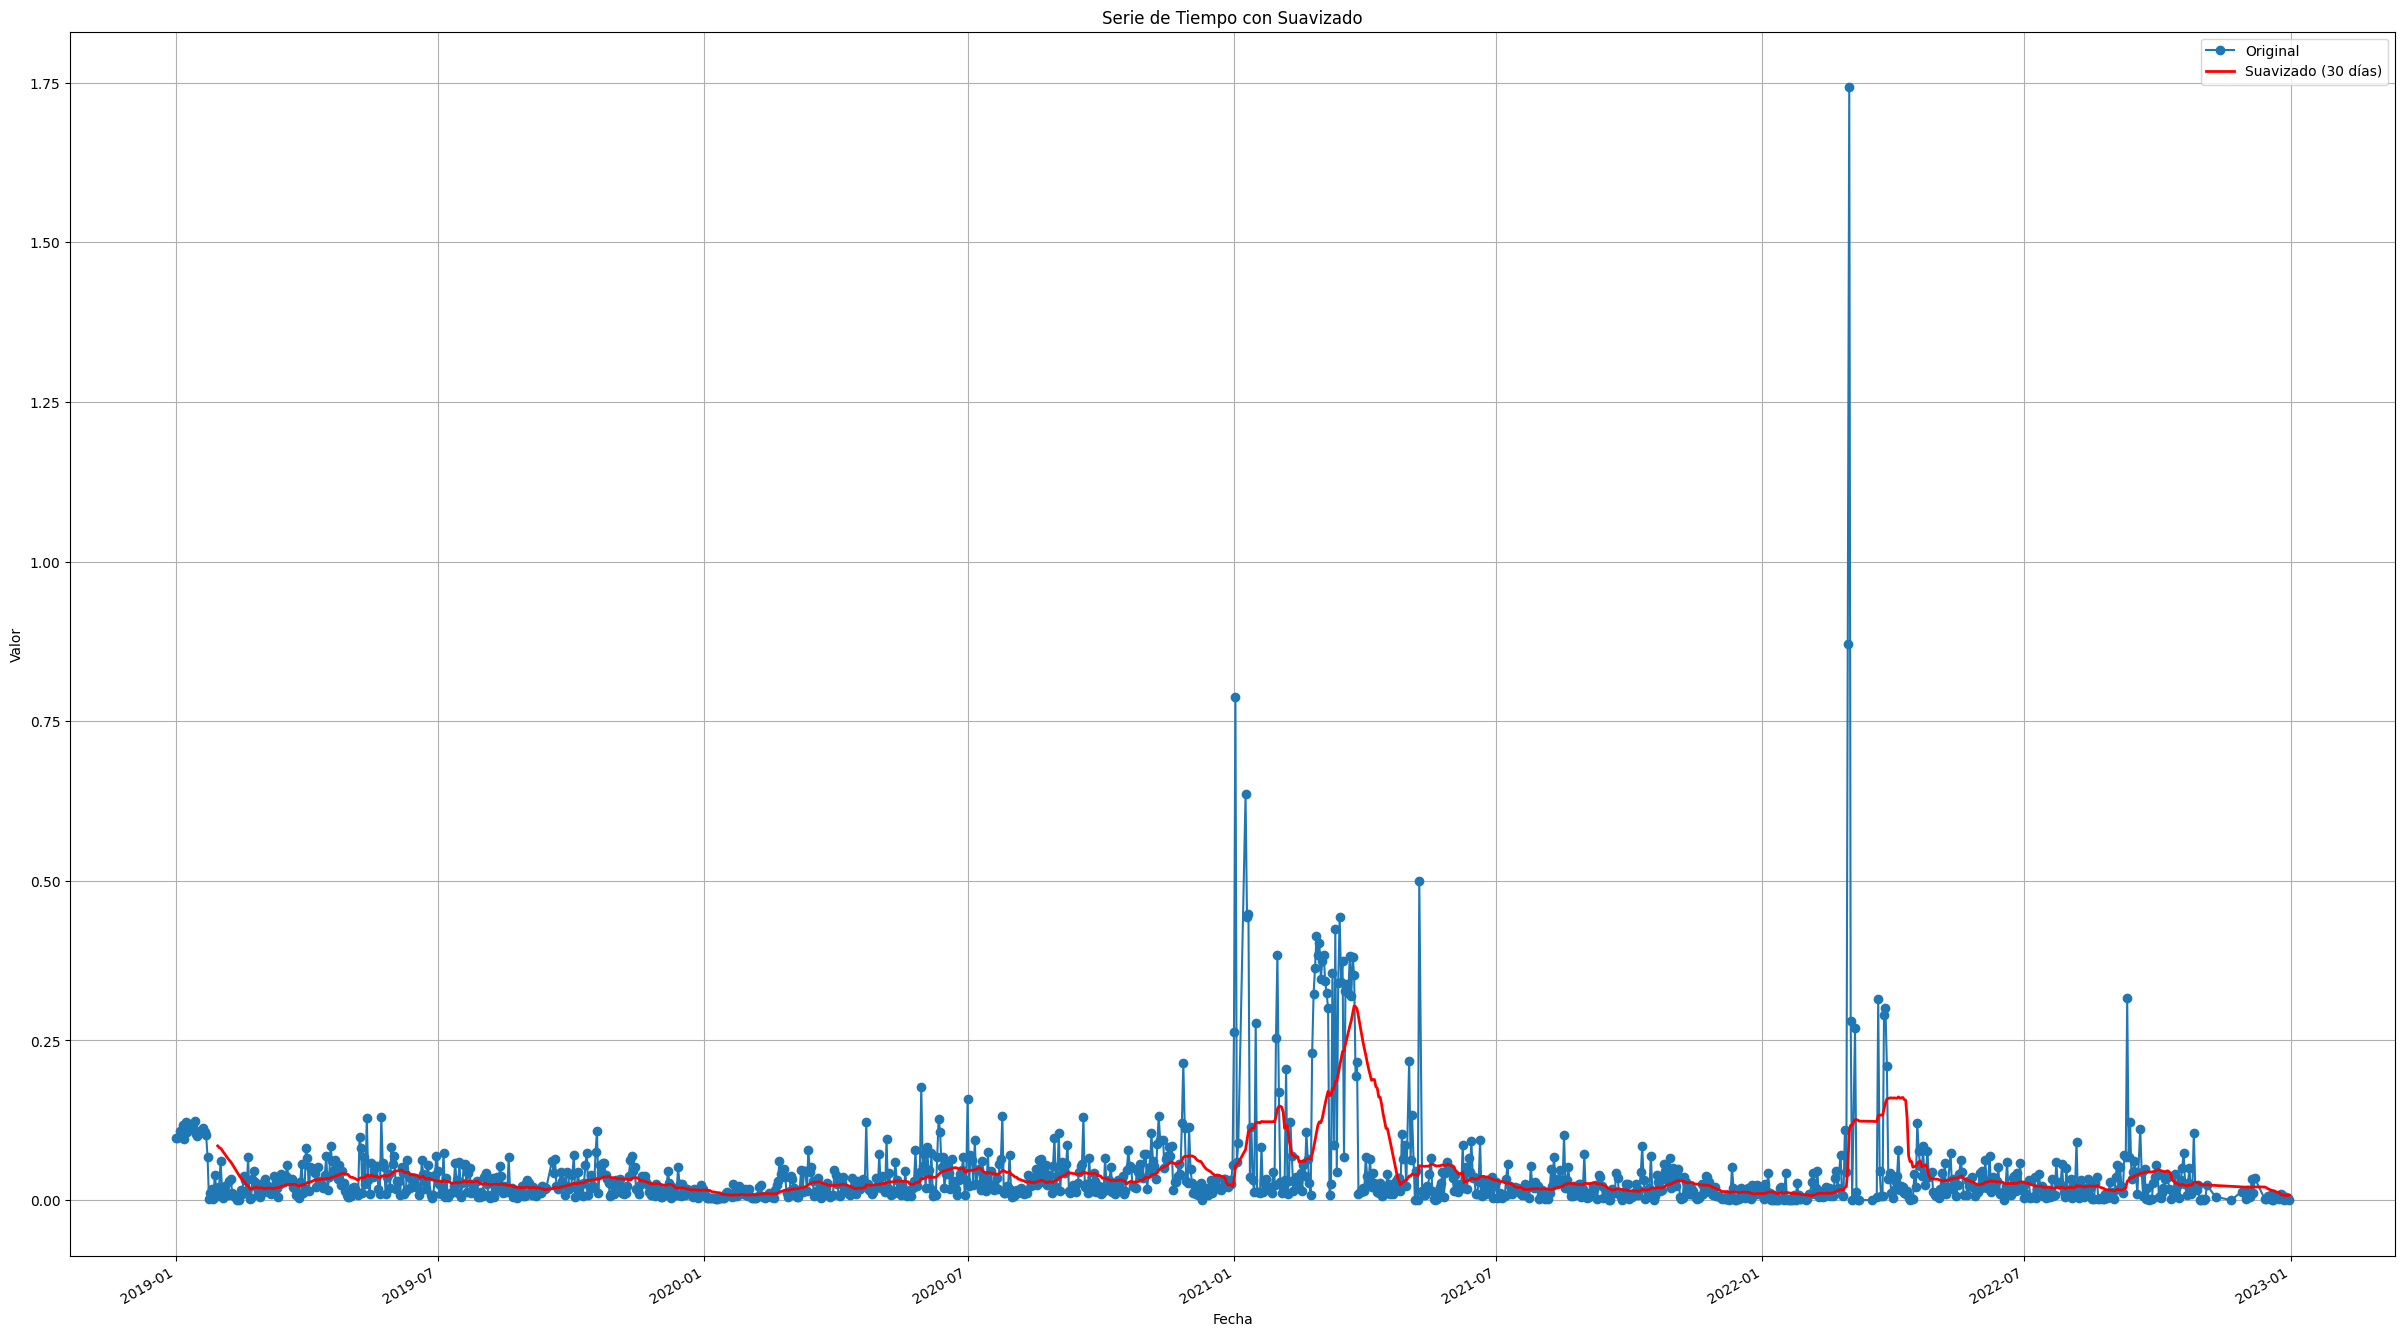

In [ ]:
# Se grafica la distribución de los datos de lluvia, con ayuda de un roling que permita suavizar los datos
# Esta grafica no presenta una tendencia estacionaria por simple inspección visual, haciendo un rolling de 30 días
# (también se probo con 7 días para llegar a la misma conclusión
# Calcular el promedio móvil con ventana de 30 días
promedio_movil = df_precipitacion_cundinamarca['promedio_precipitaciones'].rolling(window=30).mean()

# Graficar la serie de tiempo con promedio móvil
plt.figure(figsize=(30, 18))
plt.plot(df_precipitacion_cundinamarca['FechaObservacion'], df_precipitacion_cundinamarca['promedio_precipitaciones'], marker='o', linestyle='-', label='Original')
plt.plot(df_precipitacion_cundinamarca['FechaObservacion'], promedio_movil, color='red', linestyle='-', linewidth=2, label='Suavizado (30 días)')

# Ajustar formato de fechas en el eje x
plt.gcf().autofmt_xdate()

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de Tiempo con Suavizado')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [ ]:
#Se hace una fusion de los datasets para correlacionar sus variables
df_precipitacion_alimentos = pd.merge(df_precipitacion_cundinamarca, df_alimentos_cundinamarca, on='FechaObservacion', how='inner')

In [ ]:
#Se verifican los cambios realizados
print(df_precipitacion_alimentos.head())
df_precipitacion_alimentos.info()

  FechaObservacion  Departamento  promedio_precipitaciones    FRUTAS  \
0       2019-01-02  CUNDINAMARCA                  0.098012  420270.0   
1       2019-01-03  CUNDINAMARCA                  0.098663  420316.0   
2       2019-01-04  CUNDINAMARCA                  0.108652  622737.0   
3       2019-01-05  CUNDINAMARCA                  0.108675  402158.0   
4       2019-01-06  CUNDINAMARCA                  0.117437   53225.0   

   TUBERCULOS, RAICES Y PLATANOS  VERDURAS Y HORTALIZAS  
0                       370800.0              1087314.0  
1                      1070960.0              1809516.0  
2                      1512150.0              1718775.0  
3                      1242150.0              1386096.0  
4                       886360.0               241629.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         ----------

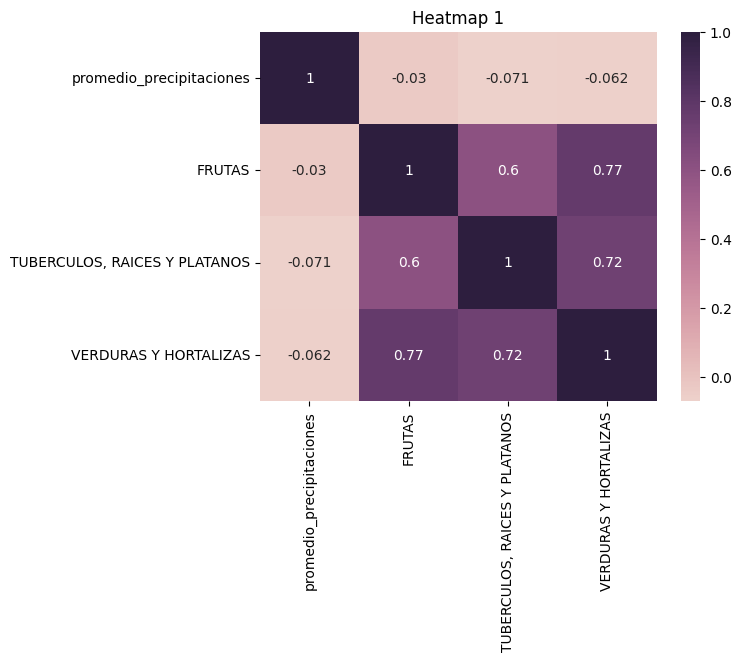

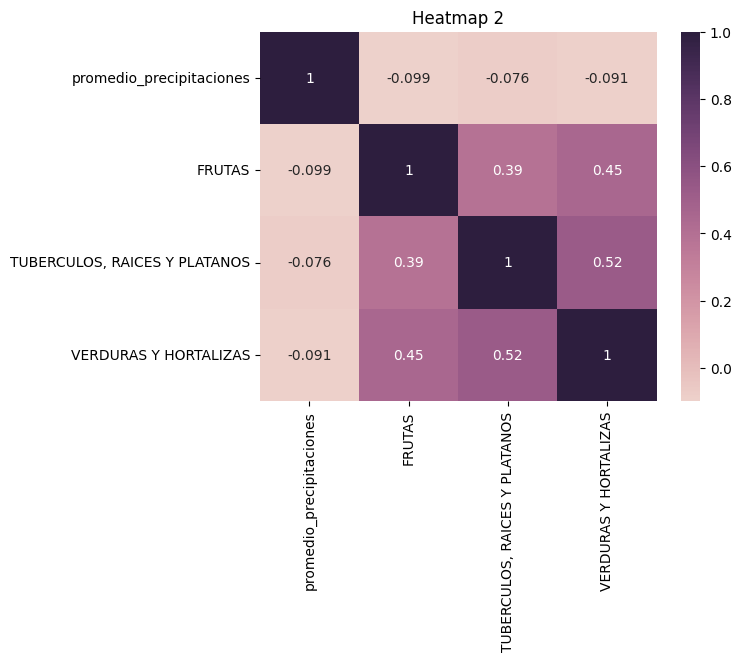

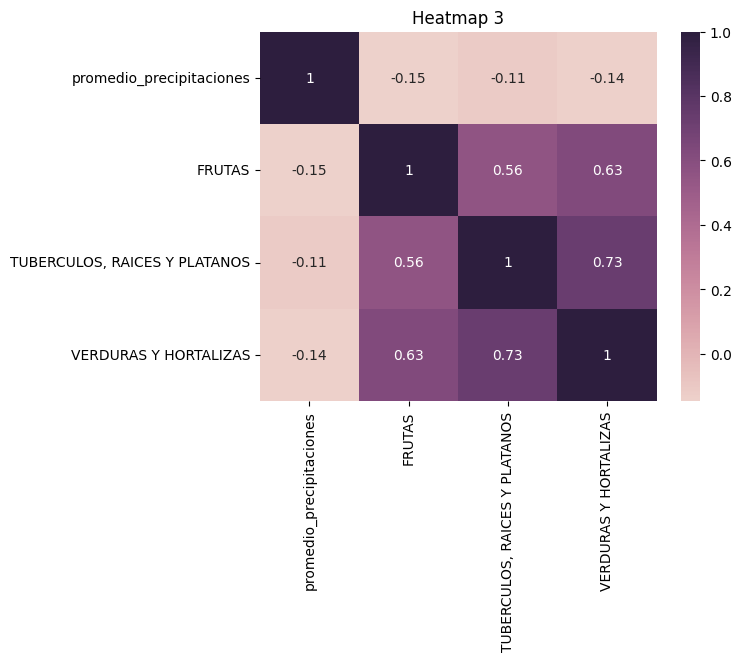

In [ ]:
# Se verifican distintos tipos de correlación con distintos criterios; Pearson, kendall y spearman
# Con estas correlaciones se deduce que no hay una asociación fuerte entre las variables de alimentos con la precipitación en lo que concierte a este dataSet
# y los distintos filtros applicados para el departamento de cundinamarca
corr_p = df_precipitacion_alimentos.drop(['FechaObservacion', 'Departamento' ], axis=1).corr()
corr_k = df_precipitacion_alimentos.drop(['FechaObservacion', 'Departamento'], axis=1).corr(method = "kendall")
corr_s = df_precipitacion_alimentos.drop(['FechaObservacion', 'Departamento'], axis=1).corr(method = "spearman")

for i, corr in enumerate([corr_p, corr_k, corr_s], 1):
    plt.figure()  # Create a new figure for each heatmap
    sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title(f"Heatmap {i}")  # Set a title for each heatmap
    plt.show()  # Display each heatmap separately

## Energia

In [ ]:
# Se obtiene el cliente de XM para hacer los llamados a la base de datos que devuelve el dataset
objetoAPI = pydataxm.ReadDB()

In [ ]:
# Se obtienen todas las colecciones disponibles utilizando el método get_collections() de la API.
df = objetoAPI.get_collections()

In [ ]:
#Muestreo de las variables disponibles
df.head(5)

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...
1,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
2,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia...
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
4,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...


In [ ]:
# Se obtiene el conjunto de datos de la colección "VoluUtilDiarEner" usando el método get_collections del objeto API.
# Esto retorna las características de las variables, su ID, tipos de métrica (Sistema o embalse) y los filtros que se pueden aplicar.
df_energia = objetoAPI.get_collections("VoluUtilDiarEner")

# Descripción de la métrica: "Volumen almacenado por encima del Nivel Mínimo Técnico, reportado diariamente por los agentes.
# En % corresponde a la relación entre el Volumen Util Diario y la Capacidad Util del Embalse".

# Se muestran las filas del conjunto de datos obtenidos.
df_energia.head()

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
119,VoluUtilDiarEner,Volumen Útil diario Energía por Sistema,Sistema,31,DailyEntities,http://servapibi.xm.com.co/daily,No aplica,kWh,Volumen almacenado por encima del Nivel Minimo...
133,VoluUtilDiarEner,Volumen Útil diario Energía por Embalse,Embalse,31,DailyEntities,http://servapibi.xm.com.co/daily,Nombre Embalse,kWh,Volumen almacenado por encima del Nivel Minimo...


In [ ]:
# Se realiza el mismo procedimiento para el conjunto de datos de la colección "PPPrecBolsNaci"
#"El Precio de Bolsa ponderado  se calcula como un ponderado de las ventas  en bolsa Nacional en el periodo (Valor/Magnitud)
# a partir de la versión tx2. Para la versión tx1 se pondera con la generación."
#"MetricUnits": "COP/kWh",
df_rios = objetoAPI.get_collections("PPPrecBolsNaci")
df_rios.head()

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
160,PPPrecBolsNaci,Precio Bolsa Nacional Ponderado por Sistema,Sistema,31,DailyEntities,http://servapibi.xm.com.co/daily,No aplica,COP/kWh,El Precio de Bolsa ponderado se calcula como ...


In [ ]:
# Se importa la clase ReadDB del módulo pydataxm
# para acceder a la API y solicitar datos.
API = pydataxm.ReadDB()

# Se solicitan datos del conjunto "VoluUtilDiarEner"
# para la región "Embalse" en el rango de fechas del 1 de enero de 2019 al 31 de diciembre de 2022,
# aplicando los filtros "CHUZA" y "AGREGADO BOGOTA".
df_energia_cundinamarca = API.request_data(
    "VoluUtilDiarEner",
    "Embalse",
    dt.date(2019,1,1),
    dt.date(2022,12,31),
    filtros=["CHUZA",'AGREGADO BOGOTA']
)

In [ ]:
# Se importa la clase ReadDB del módulo pydataxm para acceder a la API.
API = pydataxm.ReadDB()

# Se solicitan datos del conjunto "PPPrecBolsNaci" para el sistema "Sistema"
# en el rango de fechas del 1 de enero de 2019 al 31 de diciembre de 2022.
df_energia_cundinamarca_precio = API.request_data(
    "PPPrecBolsNaci",
    "Sistema",
    dt.date(2019,1,1),
    dt.date(2022,12,31)
)

In [ ]:
#Info General del Volumen de los embalses en el dataset de Cundinamarca
df_energia_cundinamarca.head(5)

,Id,Name,Value,Date
0,Embalse,AGREGADO BOGOTA,2.591158e+09,2022-12-11
1,Embalse,CHUZA,6.408049e+08,2022-12-11
2,Embalse,AGREGADO BOGOTA,2.587936e+09,2022-12-12
3,Embalse,CHUZA,6.362572e+08,2022-12-12
4,Embalse,AGREGADO BOGOTA,2.586091e+09,2022-12-13


In [ ]:
##Info General del Precio de la energia COP/KWh
df_energia_cundinamarca_precio.head()

,Id,Value,Date
0,Sistema,244.51668,2022-12-11
1,Sistema,245.85037,2022-12-12
2,Sistema,258.86852,2022-12-13
3,Sistema,271.52045,2022-12-14
4,Sistema,288.04628,2022-12-15


In [ ]:
# Se muestran los valores únicos presentes en la columna 'Name' del DataFrame para verificar que tenemos los embalses de esta region
df_energia_cundinamarca['Name'].unique()

array(['AGREGADO BOGOTA', 'CHUZA'], dtype=object)

In [ ]:
# Info general del dataset de Volumen de embalses de CUndinamarca
df_energia_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      2922 non-null   object        
 1   Name    2922 non-null   object        
 2   Value   2922 non-null   float64       
 3   Date    2922 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 114.1+ KB


In [ ]:
# Se agrupa el DataFrame df_energia_cundinamarca por las columnas 'fechaobservacion' Date de esta forma lo tenemos por dia
# Luego se calcula el promedio de los valores observados de volumen('value').
df_energia_cundinamarca_mean = df_energia_cundinamarca.groupby(['Date']).agg(Volumen_prom_Cund=('Value', 'mean'))

# Se resetea el índice del DataFrame df_energia_cundinamarca_mean.
df_energia_cundinamarca_mean = df_energia_cundinamarca_mean.reset_index()

In [ ]:
df_energia_cundinamarca_mean.head()

,Date,Volumen_prom_Cund
0,2019-01-01,1.136003e+09
1,2019-01-02,1.130113e+09
2,2019-01-03,1.124686e+09
3,2019-01-04,1.119264e+09
4,2019-01-05,1.113296e+09


In [ ]:
df_energia_cundinamarca_mean.columns

Index(['Date', 'Volumen_prom_Cund'], dtype='object')

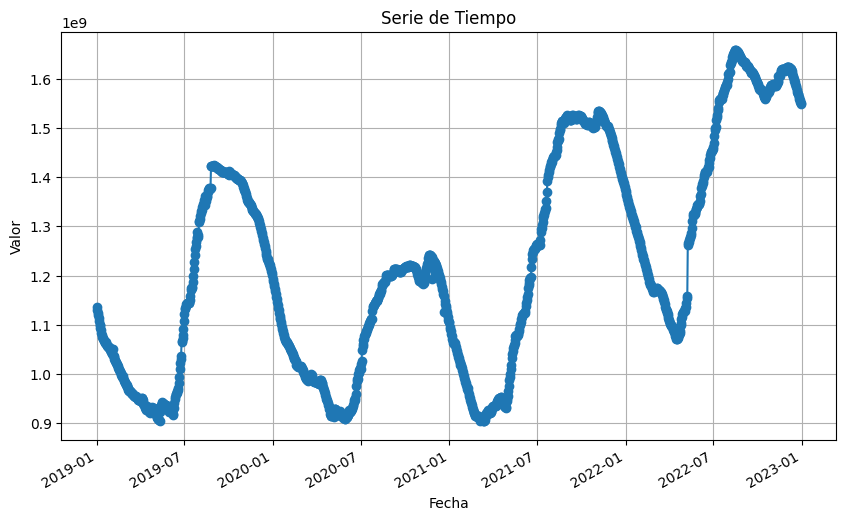

In [ ]:
# Graficar el Volumen prom de los embalses de Cundinamarca desde el 2019 hasta el 2022
plt.figure(figsize=(10, 6))
plt.plot(df_energia_cundinamarca_mean['Date'], df_energia_cundinamarca_mean["Volumen_prom_Cund"], marker='o', linestyle='-')

# Ajustar formato de fechas en el eje x
plt.gcf().autofmt_xdate()

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [ ]:
df_energia_cundinamarca_mean

,Date,Volumen_prom_Cund
0,2019-01-01,1.136003e+09
1,2019-01-02,1.130113e+09
2,2019-01-03,1.124686e+09
3,2019-01-04,1.119264e+09
4,2019-01-05,1.113296e+09
...,...,...
1456,2022-12-27,1.558227e+09
1457,2022-12-28,1.555489e+09
1458,2022-12-29,1.552759e+09
1459,2022-12-30,1.550141e+09


In [ ]:
# Renombrar columnas para poder realizar el merge
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.rename(columns={'FechaObservacion': 'Date', 'promedio': 'promedio_precipitaciones'})

# Combinar DataFrames
df_precipitacion_energia = pd.merge(df_precipitacion_cundinamarca, df_energia_cundinamarca_mean, on='Date', how='inner')

In [ ]:
#Info del dataframe unido
df_precipitacion_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1401 non-null   datetime64[ns]
 1   Departamento              1401 non-null   object        
 2   promedio_precipitaciones  1401 non-null   float64       
 3   Volumen_prom_Cund         1401 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 43.9+ KB


In [ ]:
# Seleccionar columnas numéricas
numCols = df_precipitacion_energia.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns.tolist()

# Mostrar las primeras dos filas de las columnas numéricas
df_precipitacion_energia[numCols].head(2)

,promedio_precipitaciones,Volumen_prom_Cund
0,0.097617,1.136003e+09
1,0.098012,1.130113e+09


In [ ]:
# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los valores de las columnas numéricas en el conjunto de datos Volumen de ebalses y precipitacion
df_precipitacion_energia[numCols] = scaler.fit_transform(df_precipitacion_energia[numCols])

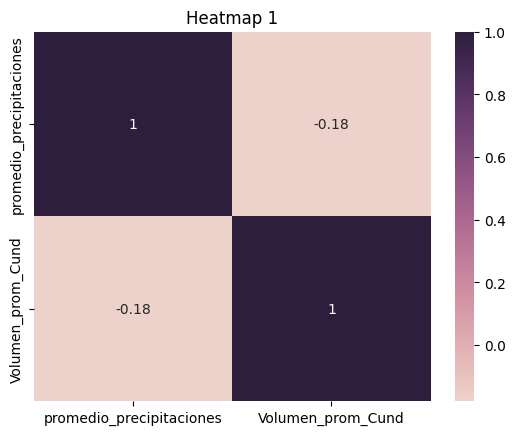

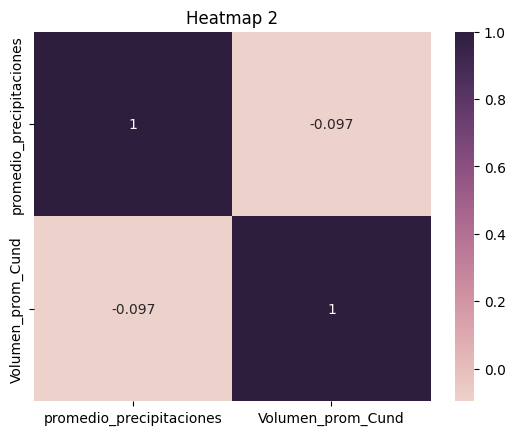

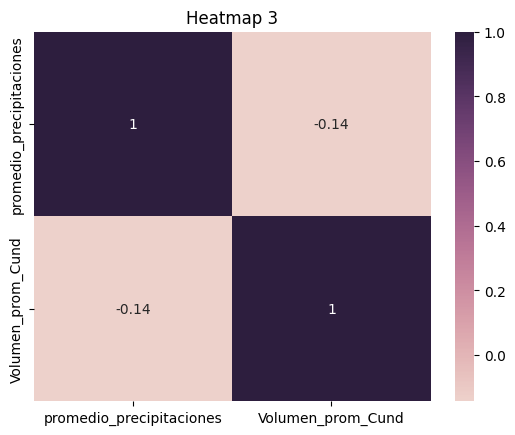

In [ ]:
# Calcular la correlación de Pearson
corr_p = df_precipitacion_energia.drop(['Date', 'Departamento'], axis=1).corr()

# Calcular la correlación de Kendall
corr_k = df_precipitacion_energia.drop(['Date', 'Departamento'], axis=1).corr(method="kendall")

# Calcular la correlación de Spearman
corr_s = df_precipitacion_energia.drop(['Date', 'Departamento'], axis=1).corr(method="spearman")

# Visualizar la matriz de correlación de Pearson con un mapa de calor
for i, corr in enumerate([corr_p, corr_k, corr_s], 1):
    plt.figure()  # Create a new figure for each heatmap
    sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title(f"Heatmap {i}")  # Set a title for each heatmap
    plt.show()  # Display each heatmap separately

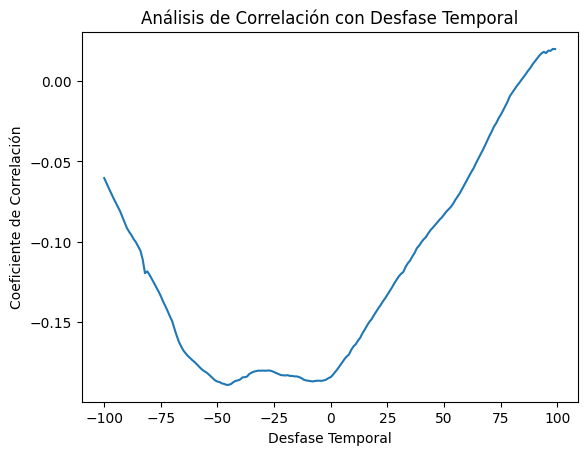

Desfase temporal óptimo con máxima correlación: -46


-0.188978247505632

In [ ]:
# Calcular correlaciones para diferentes desfases temporales
# max_lag = -40  # Máximo desfase temporal a considerar (puedes ajustarlo)
desfases = range(-100, 100)
correlaciones = []

for desfase in desfases:
    # Desplazar los datos de precipitación según la cantidad de desfase
    precipitacion_desplazada = df_precipitacion_cundinamarca.shift(-desfase)

    # Calcular la correlación entre la precipitación desplazada y los datos de nivel de agua
    correlacion = df_energia_cundinamarca_mean["Volumen_prom_Cund"].corr(precipitacion_desplazada['promedio_precipitaciones'])
    correlaciones.append(correlacion)

# Encontrar el desfase temporal óptimo con la máxima correlación
desfase_optimo = desfases[correlaciones.index(min(correlaciones))]

# Visualizar la correlación en diferentes desfases temporales
import matplotlib.pyplot as plt

plt.plot(desfases, correlaciones)
plt.xlabel('Desfase Temporal')
plt.ylabel('Coeficiente de Correlación')
plt.title('Análisis de Correlación con Desfase Temporal')
plt.show()

print(f"Desfase temporal óptimo con máxima correlación: {desfase_optimo}")
min(correlaciones)

In [ ]:
shifted_rainfall_original = df_precipitacion_cundinamarca.copy()
shifted_rainfall_desfasado = df_precipitacion_cundinamarca.copy()

In [ ]:
shifted_rainfall_desfasado['Date'] = shifted_rainfall_desfasado['Date'] - pd.DateOffset(days=desfase_optimo)

In [ ]:
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.rename(columns={'FechaObservacion': 'Date', 'promedio': 'promedio_precipitaciones'})
df_precipitacion_energia_original = pd.merge(shifted_rainfall_original, df_energia_cundinamarca_mean, on='Date', how='inner')

In [ ]:
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.rename(columns={'FechaObservacion': 'Date', 'promedio': 'promedio_precipitaciones'})
df_precipitacion_energia_desfasado = pd.merge(shifted_rainfall_desfasado, df_energia_cundinamarca_mean, on='Date', how='inner')

In [ ]:
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
df_precipitacion_energia_original[numCols] = scaler.fit_transform(df_precipitacion_energia_original[numCols])
df_precipitacion_energia_desfasado[numCols] = scaler.fit_transform(df_precipitacion_energia_desfasado[numCols])

In [ ]:
# Resample a frecuencia semanal y calcular el promedio rodante (rolling average) por semana
df_monthly = df_precipitacion_energia_original.drop(['Departamento'], axis=1).set_index('Date').resample('D').mean()

# Crear el gráfico con Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y=df_monthly.columns, title='Rolling Average by Month')

# Mostrar el gráfico
fig.show()

In [ ]:
# Resample a frecuencia semanal y calcular el promedio rodante (rolling average) por semana
df_monthly = df_precipitacion_energia_desfasado.drop(['Departamento'], axis=1).set_index('Date').resample('D').mean()

# Crear el gráfico con Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y=df_monthly.columns, title='Rolling Average by Month')

# Mostrar el gráfico
fig.show()

### Energia Precio

In [ ]:
# Fusionar los DataFrames df_energia_cundinamarca y df_energia_cundinamarca_precio basándose en la columna 'Date' con unión interna
df_precipitacion_energia_precio = pd.merge(df_energia_cundinamarca, df_energia_cundinamarca_precio, on='Date', how='inner')

In [ ]:
# Seleccionar columnas numéricas
numCols = df_precipitacion_energia_precio.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns.tolist()

# Mostrar todas las filas de las columnas numéricas
df_precipitacion_energia_precio[numCols]

,Volumn_util,Precio
0,2.591158e+09,244.51668
1,6.408049e+08,244.51668
2,2.587936e+09,245.85037
3,6.362572e+08,245.85037
4,2.586091e+09,258.86852
...,...,...
2917,4.324863e+08,309.22998
2918,1.672519e+09,300.42450
2919,4.335708e+08,300.42450
2920,1.656802e+09,304.19182


In [ ]:
# Fusionar los DataFrames df_energia_cundinamarca_mean y df_energia_cundinamarca_precio basándose en la columna 'Date' con unión interna
df_precipitacion_energia_precio = pd.merge(df_energia_cundinamarca_mean, df_energia_cundinamarca_precio, on='Date', how='inner')

In [ ]:
# Seleccionar columnas numéricas
numCols = df_precipitacion_energia_precio.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns.tolist()

# Mostrar todas las filas de las columnas numéricas
df_precipitacion_energia_precio[numCols]

,Volumen_prom_Cund,Precio
0,1.136003e+09,299.03342
1,1.130113e+09,340.27696
2,1.124686e+09,375.54782
3,1.119264e+09,376.46423
4,1.113296e+09,362.74219
...,...,...
1456,1.558227e+09,468.51335
1457,1.555489e+09,509.70555
1458,1.552759e+09,508.71719
1459,1.550141e+09,457.94032


In [ ]:
# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los valores de las columnas numéricas en el conjunto de datos
df_precipitacion_energia_precio[numCols] = scaler.fit_transform(df_precipitacion_energia_precio[numCols])

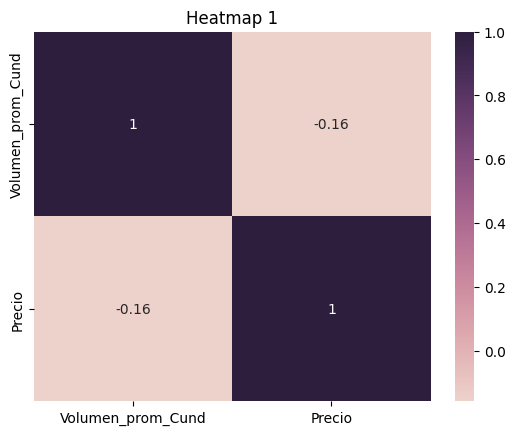

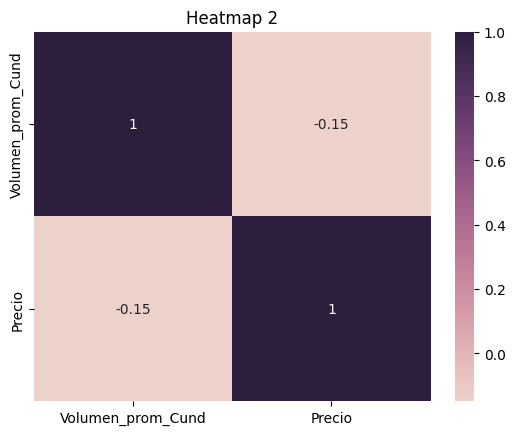

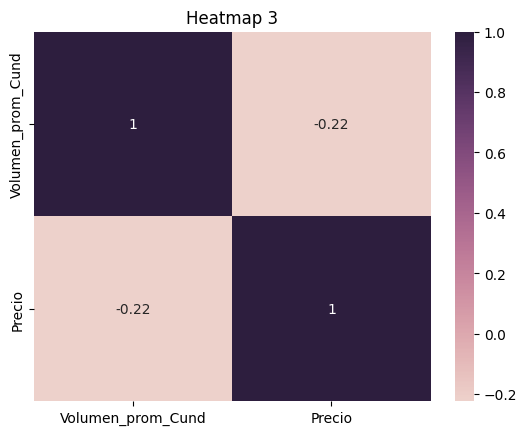

In [ ]:
# Calcular correlaciones de Pearson, Kendall y Spearman
corr_p = df_precipitacion_energia_precio.drop(['Date', 'Id'], axis=1).corr()
corr_k = df_precipitacion_energia_precio.drop(['Date', 'Id'], axis=1).corr(method="kendall")
corr_s = df_precipitacion_energia_precio.drop(['Date', 'Id'], axis=1).corr(method="spearman")

# Iterar sobre las matrices de correlación y generar mapas de calor para cada una
for i, corr in enumerate([corr_p, corr_k, corr_s], 1):
    plt.figure()  # Crear una nueva figura para cada mapa de calor
    sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title(f"Heatmap {i}")  # Establecer un título para cada mapa de calor
    plt.show()  # Mostrar cada mapa de calor por separado

## La correlación de Spearman muestra la mejor asociación entre las variables del precio y el volumen de los embalses alcanzando un -0.22

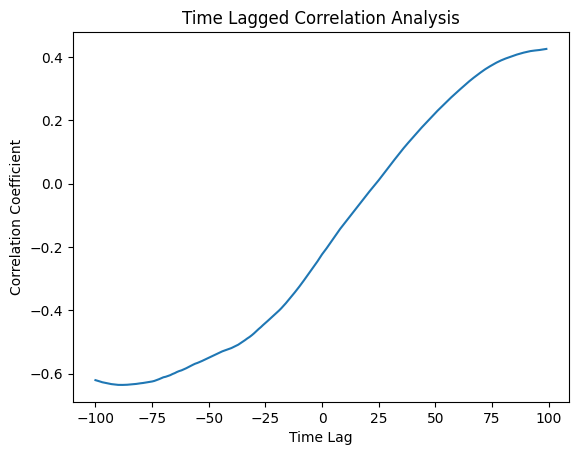

Optimal time lag with maximum correlation: -89


-0.6358380513040012

In [ ]:
# Calcular correlaciones para diferentes rezagos temporales
max_lag = -40  # Máximo rezago temporal a considerar (puedes ajustar esto)
lags = range(-100, 100)
correlations = []

for lag in lags:
    # Desplazar los datos de precio de energía por el rezago temporal
    precio_desplazado = df_precipitacion_energia_precio["Precio"].shift(-lag)

    # Calcular la correlación de Spearman entre los precios desplazados y los volúmenes de precipitación
    correlation = df_precipitacion_energia_precio["Volumen_prom_Cund"].corr(precio_desplazado, method="spearman")
    correlations.append(correlation)

# Encontrar el rezago temporal óptimo con máxima correlación
optimal_lag = lags[correlations.index(min(correlations))]

# Visualizar la correlación en diferentes rezagos temporales
import matplotlib.pyplot as plt

plt.plot(lags, correlations)
plt.xlabel('Rezago Temporal')
plt.ylabel('Coeficiente de Correlación')
plt.title('Análisis de Correlación con Rezago Temporal')
plt.show()

print(f"Rezago temporal óptimo con máxima correlación: {optimal_lag}")
min(correlations)

## Cuando se realiza un desfase entre el volumen de los embalses y sus precios, se observa una tendencia creciente en la correlación a medida que transcurre el tiempo. Esta correlación alcanza su punto máximo, llegando a -0.63 con la correlación de Spearman en 89 días, lo que equivale a aproximadamente un mes y medio.

In [ ]:
df_precipitacion_energia_precio.head()

,Date,Volumen_prom_Cund,Id,Precio
0,2019-01-01,0.307791,Sistema,0.359628
1,2019-01-02,0.299972,Sistema,0.427968
2,2019-01-03,0.292768,Sistema,0.486411
3,2019-01-04,0.285569,Sistema,0.487930
4,2019-01-05,0.277648,Sistema,0.465192


In [ ]:
# Crear copias de los DataFrames df_precipitacion_energia_precio para calcular el precio original y el precio desfasado
shifted_precio_original = df_precipitacion_energia_precio.drop(["Volumen_prom_Cund"], axis=1).copy()
shifted_precio_desfasado = df_precipitacion_energia_precio.drop(["Volumen_prom_Cund"], axis=1).copy()

# Calcular la fecha desfasada restando el desfase óptimo al DataFrame de fechas originales
shifted_precio_desfasado['Date'] = shifted_precio_desfasado['Date'] - pd.DateOffset(days=desfase_optimo)

In [ ]:
# Renombrar columnas en df_precipitacion_energia_precio para mayor claridad y consistencia
df_precipitacion_cundinamarca = df_precipitacion_energia_precio.rename(columns={'FechaObservacion': 'Date', 'promedio': 'promedio_precipitaciones'})

# Fusionar el DataFrame de precios originales con el DataFrame de promedios de energía de Cundinamarca basándose en la columna 'Date' con unión interna
shifted_precio_original = pd.merge(shifted_precio_original, df_energia_cundinamarca_mean, on='Date', how='inner')

In [ ]:
# Renombrar columnas en df_precipitacion_cundinamarca para mayor claridad y consistencia
df_precipitacion_cundinamarca = df_precipitacion_cundinamarca.rename(columns={'FechaObservacion': 'Date', 'promedio': 'promedio_precipitaciones'})

# Fusionar el DataFrame de precios desfasados con el DataFrame de promedios de energía de Cundinamarca basándose en la columna 'Date' con unión interna
shifted_precio_desfasado = pd.merge(shifted_precio_desfasado, df_energia_cundinamarca_mean, on='Date', how='inner')

In [ ]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los valores de las columnas numéricas en el DataFrame de precios desfasados
shifted_precio_desfasado[numCols] = scaler.fit_transform(shifted_precio_desfasado[numCols])

# Escalar los valores de las columnas numéricas en el DataFrame de precios originales
shifted_precio_original[numCols] = scaler.fit_transform(shifted_precio_original[numCols])

In [ ]:
# Re-muestrear a una frecuencia semanal y calcular el promedio rodante (rolling average) por semana
# Eliminar la columna 'Id', establecer la columna 'Date' como índice y calcular el promedio diario
df_monthly = shifted_precio_original.drop(['Id'], axis=1).set_index('Date').resample('D').mean()

# Crear un gráfico utilizando Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y=df_monthly.columns, title='Rolling Average by Month')

# Mostrar el gráfico
fig.show()

In [ ]:
# Re-muestrear a una frecuencia semanal y calcular el promedio mediante Rolling Average por semana
# Eliminar la columna 'Id', establecer la columna 'Date' como índice y calcular el promedio diario
df_monthly = shifted_precio_desfasado.drop(['Id'], axis=1).set_index('Date').resample('D').mean()

# Crear un gráfico utilizando Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y=df_monthly.columns, title='Rolling Average by Month')

# Mostrar el gráfico
fig.show()


### Gráficamente, se puede observar que al desplazar el dataframe de precios 89 días hacia la derecha, se nota una relación inversamente proporcional con el volumen de los embalses.